In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, tukey_hsd, levene, shapiro
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def load_and_prepare_data():
    """加载和准备数据"""
    # 读取数据
    data = pd.read_csv('../pre_data/微观叙事-句法-grade.csv')
    
    # 将年级标签转换为更易理解的名称
    grade_mapping = {1: '高一', 2: '高二', 3: '高三'}
    data['年级名称'] = data['年级'].map(grade_mapping)
    
    # 按年级分组数据
    grade_groups = {grade: group for grade, group in data.groupby('年级名称')}
    
    return data, grade_groups

In [3]:
data,grade_groups = load_and_prepare_data()

In [9]:
def descriptive_statistics_syntactic(data, grade_groups):
    """微观叙事句法描述性统计分析"""
    print("=" * 80)
    print("微观叙事句法描述性统计分析报告")
    print("=" * 80)
    
    # 1. 基本统计信息
    print("\n1. 数据基本信息：")
    print(f"总样本数：{len(data)}")
    print(f"年级分布：\n{data['年级名称'].value_counts().sort_index()}")
    
    # 2. 各年级描述性统计
    print("\n2. 各年级描述性统计：")
    
    indicators = {
        '短语长度-SYNLE': '短语长度-SYNLE（69）',
        '短语长度-SYNNP': '短语长度-SYNNP（70）',
        '短语密度-DRNP': '短语密度-DRNP（76）',
        '短语密度-DRVP': '短语密度-DRVP（77）',
        '短语密度-DRPP': '短语密度-DRPP（79）',
        '句子长度-DESSL': '句子长度-DESSL（06）',
        '句子结构-DRPVAL': '句子结构-DRPVAL（80）',
        '句子结构-DRNEG': '句子结构-DRNEG（81）',
        '句子结构-DRINF': '句子结构-DRINF（83）',
        '句法相似-SYNSTRUTa': '句法相似-SYNSTRUTa（74）',
        '句法相似-SYNSTRUTt': '句法相似-SYNSTRUTt（75）'
    }
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        print(f"\n{grade_name}：")
        print(f"  样本数：{len(group_data)}")
        
        for name, col in indicators.items():
            mean_val = group_data[col].mean()
            std_val = group_data[col].std()
            print(f"  {name} - 均值：{mean_val:.3f}, 标准差：{std_val:.3f}")

def normality_test_syntactic(data, grade_groups):
    """正态性检验"""
    print("\n3. 正态性检验：")
    
    indicators = {
        '短语长度-SYNLE': '短语长度-SYNLE（69）',
        '短语长度-SYNNP': '短语长度-SYNNP（70）',
        '短语密度-DRNP': '短语密度-DRNP（76）',
        '短语密度-DRVP': '短语密度-DRVP（77）',
        '短语密度-DRPP': '短语密度-DRPP（79）',
        '句子长度-DESSL': '句子长度-DESSL（06）',
        '句子结构-DRPVAL': '句子结构-DRPVAL（80）',
        '句子结构-DRNEG': '句子结构-DRNEG（81）',
        '句子结构-DRINF': '句子结构-DRINF（83）',
        '句法相似-SYNSTRUTa': '句法相似-SYNSTRUTa（74）',
        '句法相似-SYNSTRUTt': '句法相似-SYNSTRUTt（75）'
    }
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        print(f"\n{grade_name}：")
        
        for name, col in indicators.items():
            stat, p_val = shapiro(group_data[col])
            print(f"  {name} - Shapiro-Wilk检验：W={stat:.4f}, p={p_val:.4f} {'(正态分布)' if p_val > 0.05 else '(非正态分布)'}")

def variance_homogeneity_test_syntactic(data, grade_groups):
    """方差齐性检验"""
    print("\n4. 方差齐性检验：")
    
    indicators = {
        '短语长度-SYNLE': '短语长度-SYNLE（69）',
        '短语长度-SYNNP': '短语长度-SYNNP（70）',
        '短语密度-DRNP': '短语密度-DRNP（76）',
        '短语密度-DRVP': '短语密度-DRVP（77）',
        '短语密度-DRPP': '短语密度-DRPP（79）',
        '句子长度-DESSL': '句子长度-DESSL（06）',
        '句子结构-DRPVAL': '句子结构-DRPVAL（80）',
        '句子结构-DRNEG': '句子结构-DRNEG（81）',
        '句子结构-DRINF': '句子结构-DRINF（83）',
        '句法相似-SYNSTRUTa': '句法相似-SYNSTRUTa（74）',
        '句法相似-SYNSTRUTt': '句法相似-SYNSTRUTt（75）'
    }
    
    for name, col in indicators.items():
        grade1_data = grade_groups['高一'][col]
        grade2_data = grade_groups['高二'][col]
        grade3_data = grade_groups['高三'][col]
        
        stat, p_val = levene(grade1_data, grade2_data, grade3_data)
        print(f"{name} - Levene检验：F={stat:.4f}, p={p_val:.4f} {'(方差齐性)' if p_val > 0.05 else '(方差非齐性)'}")

def grade_comparison_analysis_syntactic(data, grade_groups):
    """年级间比较分析"""
    print("\n5. 年级间比较分析：")
    
    indicators = {
        '短语长度-SYNLE': '短语长度-SYNLE（69）',
        '短语长度-SYNNP': '短语长度-SYNNP（70）',
        '短语密度-DRNP': '短语密度-DRNP（76）',
        '短语密度-DRVP': '短语密度-DRVP（77）',
        '短语密度-DRPP': '短语密度-DRPP（79）',
        '句子长度-DESSL': '句子长度-DESSL（06）',
        '句子结构-DRPVAL': '句子结构-DRPVAL（80）',
        '句子结构-DRNEG': '句子结构-DRNEG（81）',
        '句子结构-DRINF': '句子结构-DRINF（83）',
        '句法相似-SYNSTRUTa': '句法相似-SYNSTRUTa（74）',
        '句法相似-SYNSTRUTt': '句法相似-SYNSTRUTt（75）'
    }
    
    for name, col in indicators.items():
        print(f"\n{name}年级间比较：")
        
        grade1_data = grade_groups['高一'][col]
        grade2_data = grade_groups['高二'][col]
        grade3_data = grade_groups['高三'][col]
        
        # 单因素方差分析
        f_stat, p_val = f_oneway(grade1_data, grade2_data, grade3_data)
        print(f"  单因素方差分析：F={f_stat:.4f}, p={p_val:.4f}")
        
        if p_val < 0.05:
            print("  结果：存在显著性差异")
            # Tukey HSD事后检验
            tukey_result = tukey_hsd(grade1_data, grade2_data, grade3_data)
            print("  Tukey HSD事后检验结果：")
            print(f"    高一 vs 高二：p={float(tukey_result.pvalue[0][1]):.4f}")
            print(f"    高一 vs 高三：p={float(tukey_result.pvalue[0][2]):.4f}")
            print(f"    高二 vs 高三：p={float(tukey_result.pvalue[1][2]):.4f}")
        else:
            print("  结果：无显著性差异")

def within_grade_analysis_syntactic(data, grade_groups):
    """年级内比较分析"""
    print("\n6. 年级内比较分析：")
    
    # 定义指标分组
    indicator_groups = {
        '短语长度指标': ['短语长度-SYNLE（69）', '短语长度-SYNNP（70）'],
        '短语密度指标': ['短语密度-DRNP（76）', '短语密度-DRVP（77）', '短语密度-DRPP（79）'],
        '句子长度指标': ['句子长度-DESSL（06）'],
        '句子结构指标': ['句子结构-DRPVAL（80）', '句子结构-DRNEG（81）', '句子结构-DRINF（83）'],
        '句法相似指标': ['句法相似-SYNSTRUTa（74）', '句法相似-SYNSTRUTt（75）']
    }
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        print(f"\n{grade_name}内部差异分析：")
        
        # 计算各组指标的变异系数
        group_cv_results = {}
        for group_name, cols in indicator_groups.items():
            group_cvs = []
            for col in cols:
                cv = group_data[col].std() / group_data[col].mean() * 100
                group_cvs.append(cv)
            # 取该组指标的平均变异系数
            group_cv_results[group_name] = np.mean(group_cvs)
        
        # 按变异系数排序
        sorted_group_cv = sorted(group_cv_results.items(), key=lambda x: x[1], reverse=True)
        
        print("  各组指标平均变异系数（从大到小排序）：")
        for group_name, cv in sorted_group_cv:
            print(f"    {group_name}：{cv:.2f}%")
        
        # 找出差异最大的指标组
        max_cv_group = sorted_group_cv[0]
        print(f"\n  差异程度最大的指标组：{max_cv_group[0]}（平均变异系数：{max_cv_group[1]:.2f}%）")
        print(f"  该指标组是影响{grade_name}阶段能力发展的关键因素")
        
        # 详细分析该组内各指标的变异系数
        print(f"\n  {max_cv_group[0]}内部各指标变异系数：")
        for col in indicator_groups[max_cv_group[0]]:
            cv = group_data[col].std() / group_data[col].mean() * 100
            print(f"    {col}：{cv:.2f}%")

def create_syntactic_visualizations(data, grade_groups):
    """创建微观叙事句法可视化图表"""
    print("\n7. 生成微观叙事句法可视化图表...")
    
    # 设置全局风格
    sns.set_theme(style="whitegrid", font="SimHei", rc={
        "axes.titlesize": 20,
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "axes.titleweight": "bold"
    })
    plt.rcParams['axes.unicode_minus'] = False
    
    # 设置颜色主题
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    grade_names = ['高一', '高二', '高三']
    
    # 定义指标
    indicators = {
        '短语长度-SYNLE': '短语长度-SYNLE（69）',
        '短语长度-SYNNP': '短语长度-SYNNP（70）',
        '短语密度-DRNP': '短语密度-DRNP（76）',
        '短语密度-DRVP': '短语密度-DRVP（77）',
        '短语密度-DRPP': '短语密度-DRPP（79）',
        '句子长度-DESSL': '句子长度-DESSL（06）',
        '句子结构-DRPVAL': '句子结构-DRPVAL（80）',
        '句子结构-DRNEG': '句子结构-DRNEG（81）',
        '句子结构-DRINF': '句子结构-DRINF（83）',
        '句法相似-SYNSTRUTa': '句法相似-SYNSTRUTa（74）',
        '句法相似-SYNSTRUTt': '句法相似-SYNSTRUTt（75）'
    }
    
    # 创建输出目录
    import os
    os.makedirs('../res', exist_ok=True)
    
    # 1. 箱线图比较
    fig, axes = plt.subplots(3, 4, figsize=(24, 18), dpi=120, constrained_layout=True)
    fig.suptitle('微观叙事句法各指标年级间分布对比', fontsize=24, fontweight='bold', color='#222', y=0.98)
    
    import pandas as pd
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    for i, (name, col) in enumerate(indicators.items()):
        row = i // 4
        col_idx = i % 4
        
        # 准备数据
        data_list = [grade_groups[grade][col] for grade in grade_names]
        
        # 构造DataFrame用于seaborn
        df = pd.DataFrame({
            '年级': np.repeat(grade_names, [len(x) for x in data_list]),
            '数值': np.concatenate(data_list)
        })
        
        # 创建小提琴图+箱线图组合
        sns.violinplot(
            x='年级', y='数值', data=df, ax=axes[row, col_idx],
            inner=None, palette=colors, linewidth=0, alpha=0.18
        )
        sns.boxplot(
            x='年级', y='数值', data=df, ax=axes[row, col_idx],
            width=0.25, palette=colors, boxprops=dict(alpha=0.7)
        )
        
        # 添加均值点
        means = df.groupby('年级')['数值'].mean()
        axes[row, col_idx].scatter(
            range(len(grade_names)), means, 
            color='#E74C3C', s=80, marker='D', 
            edgecolor='white', zorder=10, label='均值'
        )
        
        # 美化设置
        axes[row, col_idx].set_title(f'{name}', fontsize=16, fontweight='bold', color='#222')
        axes[row, col_idx].set_xlabel('年级', fontsize=14, fontweight='bold')
        axes[row, col_idx].set_ylabel('数值', fontsize=14, fontweight='bold')
        axes[row, col_idx].grid(axis='y', linestyle='--', alpha=0.25)
        axes[row, col_idx].set_axisbelow(True)
        axes[row, col_idx].spines['top'].set_visible(False)
        axes[row, col_idx].spines['right'].set_visible(False)
        
        # 设置x轴标签
        axes[row, col_idx].set_xticklabels(grade_names, fontsize=12, fontweight='bold')
    
    # 自定义图例（只在第一个子图中显示）
    legend_elements = [
        Patch(facecolor='#2E86AB', edgecolor='#2E86AB', label='高一', alpha=0.7),
        Patch(facecolor='#A23B72', edgecolor='#A23B72', label='高二', alpha=0.7),
        Patch(facecolor='#F18F01', edgecolor='#F18F01', label='高三', alpha=0.7),
        Line2D([0], [0], marker='D', color='w', label='均值', 
               markerfacecolor='#E74C3C', markeredgecolor='white', markersize=10)
    ]
    axes[0, 0].legend(handles=legend_elements, loc='upper right', 
                     frameon=True, fancybox=True, shadow=True, fontsize=10)
    
    # 调整布局
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # 为总标题留出空间
    
    # 保存图片
    plt.savefig('../res/微观叙事句法箱线图比较.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print("箱线图已保存为: '../res/微观叙事句法箱线图比较.png'")
    
    # 2. 变异系数热力图
    fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=120, constrained_layout=True)
    
    # 计算各年级各指标的变异系数
    cv_matrix = []
    for grade in grade_names:
        grade_data = grade_groups[grade]
        cv_row = []
        for name, col in indicators.items():
            cv = grade_data[col].std() / grade_data[col].mean() * 100
            cv_row.append(cv)
        cv_matrix.append(cv_row)
    
    cv_matrix = np.array(cv_matrix)
    
    # 创建热力图
    im = sns.heatmap(
        cv_matrix, 
        annot=True, 
        cmap='RdYlBu_r', 
        center=cv_matrix.mean(),
        square=True, 
        linewidths=2, 
        cbar_kws={"shrink": .8, "label": "变异系数 (%)"},
        ax=ax, 
        fmt='.1f', 
        annot_kws={'size': 14, 'weight': 'bold'},
        xticklabels=list(indicators.keys()),
        yticklabels=grade_names
    )
    
    # 设置标题和标签
    ax.set_title('各年级各指标变异系数热力图', fontsize=20, fontweight='bold', color='#222', pad=20)
    ax.set_xlabel('指标', fontsize=16, fontweight='bold', color='#222')
    ax.set_ylabel('年级', fontsize=16, fontweight='bold', color='#222')
    
    # 美化坐标轴
    ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='#222')
    
    # 旋转x轴标签以提高可读性
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # 调整布局
    #plt.tight_layout()
    
    # 保存图片
    plt.savefig('../res/微观叙事句法变异系数热力图.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print("变异系数热力图已保存为: '../res/微观叙事句法变异系数热力图.png'")

微观叙事句法描述性统计分析报告

1. 数据基本信息：
总样本数：300
年级分布：
年级名称
高一    100
高三    100
高二    100
Name: count, dtype: int64

2. 各年级描述性统计：

高一：
  样本数：100
  短语长度-SYNLE - 均值：3.519, 标准差：1.070
  短语长度-SYNNP - 均值：0.628, 标准差：0.106
  短语密度-DRNP - 均值：333.229, 标准差：24.492
  短语密度-DRVP - 均值：248.163, 标准差：26.908
  短语密度-DRPP - 均值：90.976, 标准差：18.070
  句子长度-DESSL - 均值：13.961, 标准差：3.156
  句子结构-DRPVAL - 均值：2.556, 标准差：3.890
  句子结构-DRNEG - 均值：7.260, 标准差：6.766
  句子结构-DRINF - 均值：18.857, 标准差：9.401
  句法相似-SYNSTRUTa - 均值：0.134, 标准差：0.034
  句法相似-SYNSTRUTt - 均值：0.132, 标准差：0.030

高二：
  样本数：100
  短语长度-SYNLE - 均值：3.706, 标准差：1.385
  短语长度-SYNNP - 均值：0.719, 标准差：0.144
  短语密度-DRNP - 均值：344.285, 标准差：29.888
  短语密度-DRVP - 均值：232.045, 标准差：26.302
  短语密度-DRPP - 均值：94.176, 标准差：21.144
  句子长度-DESSL - 均值：14.015, 标准差：3.494
  句子结构-DRPVAL - 均值：3.287, 标准差：4.155
  句子结构-DRNEG - 均值：6.629, 标准差：5.811
  句子结构-DRINF - 均值：18.789, 标准差：10.682
  句法相似-SYNSTRUTa - 均值：0.127, 标准差：0.037
  句法相似-SYNSTRUTt - 均值：0.124, 标准差：0.031

高三：
  样本数：100
  短语长度-SYNLE - 均值：4.488, 标准差：1.515

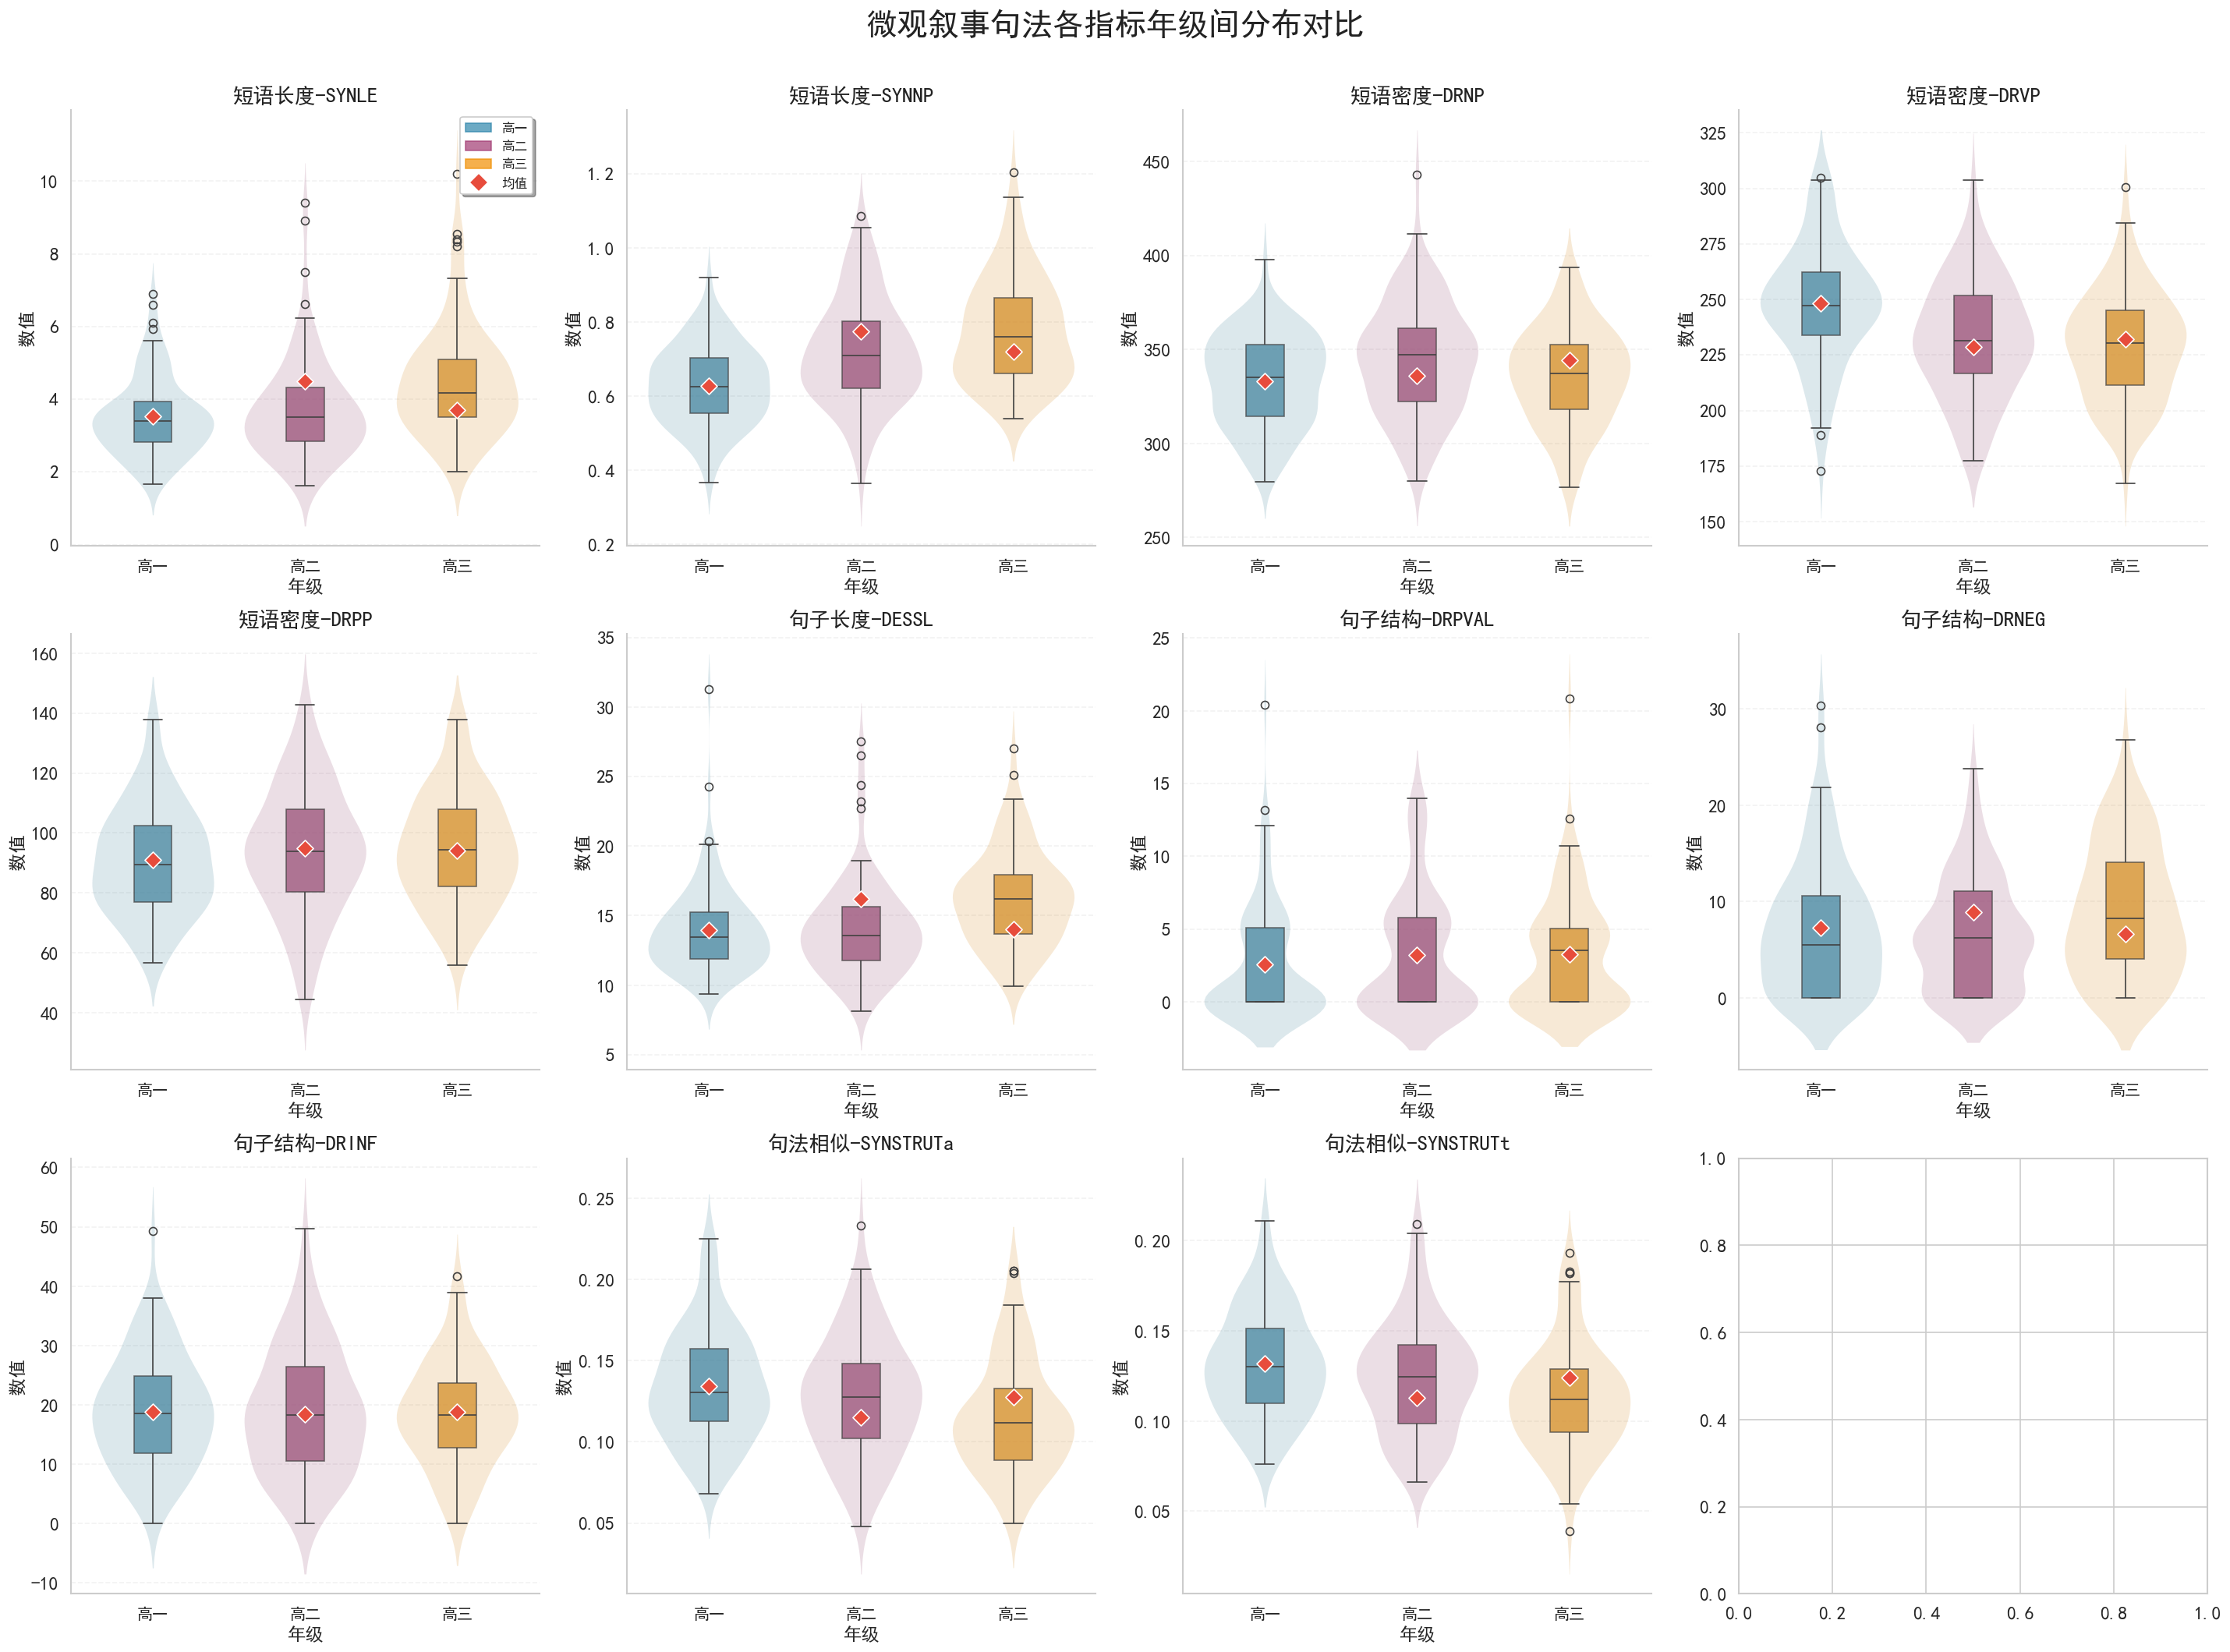

箱线图已保存为: '../res/微观叙事句法箱线图比较.png'


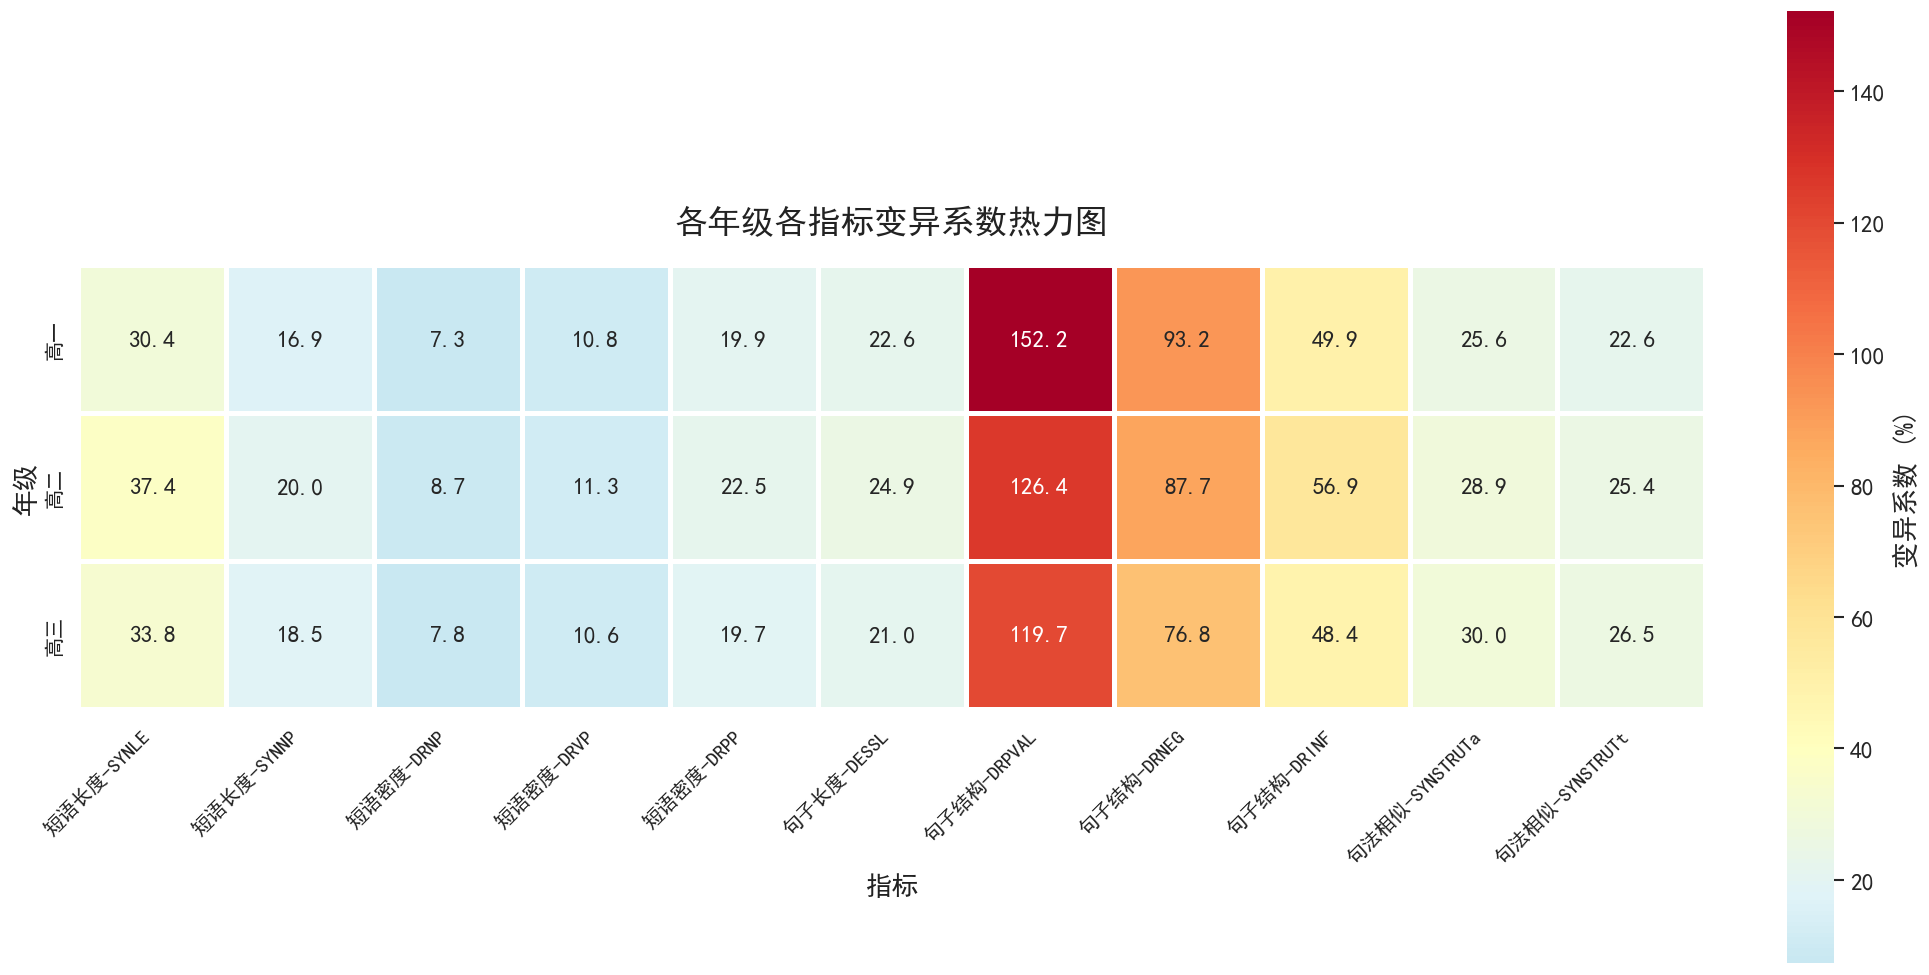

变异系数热力图已保存为: '../res/微观叙事句法变异系数热力图.png'

微观叙事句法分析完成！


In [10]:
# 加载数据
data, grade_groups = load_and_prepare_data()

# 执行各项分析
descriptive_statistics_syntactic(data, grade_groups)
normality_test_syntactic(data, grade_groups)
variance_homogeneity_test_syntactic(data, grade_groups)
grade_comparison_analysis_syntactic(data, grade_groups)
within_grade_analysis_syntactic(data, grade_groups)

# 创建可视化
create_syntactic_visualizations(data, grade_groups)

print("\n" + "=" * 80)
print("微观叙事句法分析完成！")
print("=" * 80)